# Q-Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from grid_world_environment import GridWorldEnvironment
from qAgent import QLearningAgent
from IPython.display import clear_output

np.random.seed(42)
plt.style.use("default")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Constants

In [12]:
MALFUNCTION_PROBABILITY = 0.1
EPSILON = 0.5
MIN_EPSILON = 0.05
GAMMA_EPSILON = 1/4
DELAY = 0.001
DISCOUNT_FACTOR = 1
ALPHA = 0.5
MIN_ALPHA = 0.05
GAMMA_ALPHA = 1/4

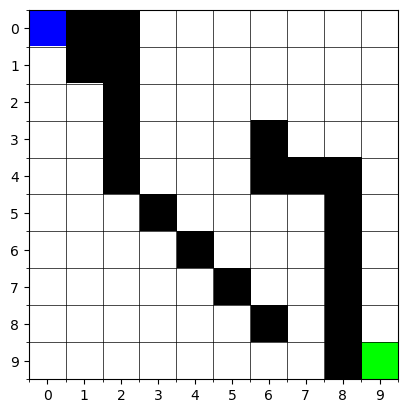

In [13]:
size = (10, 10)
obstacles = [(0,1), (0,2), (1, 1), (1,2), (2,2), (3,2), (4,2), (5,3), (6,4), (7,5), (8,6), (4,6), (3,6), (9,8), (8,8), (7,8), (6,8), (5,8), (4,8), (4,7)]
position = (0, 0)
target = (9, 9)

env = GridWorldEnvironment(size=size,
                          obstacles=obstacles,
                          position=position,
                          target=target,
                          malfunction_probability=MALFUNCTION_PROBABILITY)
env.display()

In [14]:
env.reset()
q_learning_agent = QLearningAgent(env,
                         discount_factor=DISCOUNT_FACTOR,
                         epsilon=EPSILON,
                         min_epsilon=MIN_EPSILON,
                         alpha=ALPHA,
                         min_alpha=MIN_ALPHA,
                         gamma_alpha=GAMMA_ALPHA,
                         gamma_epsilon=GAMMA_EPSILON)

## Train

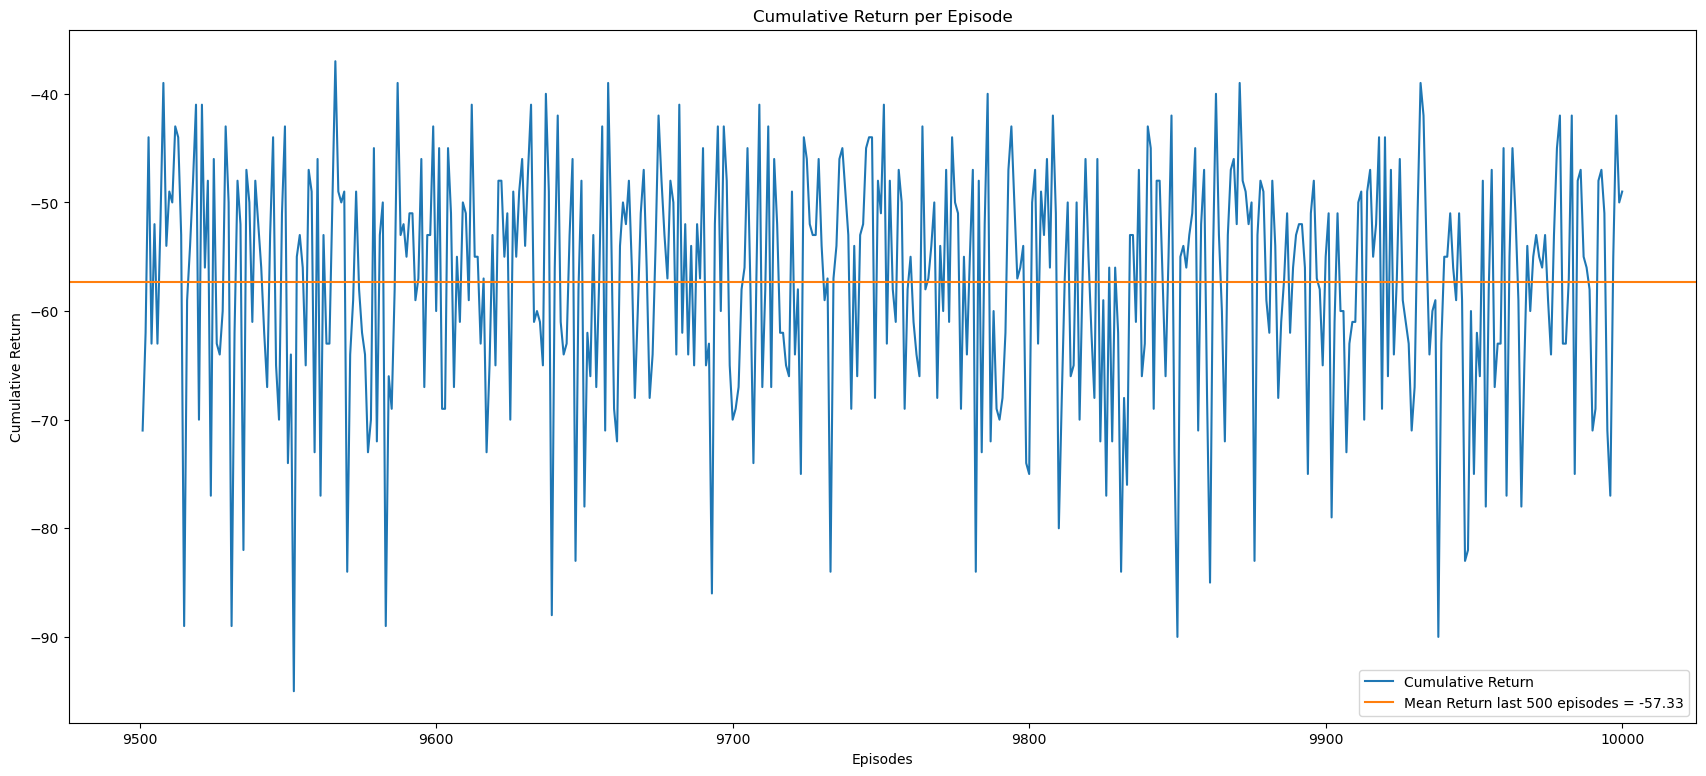

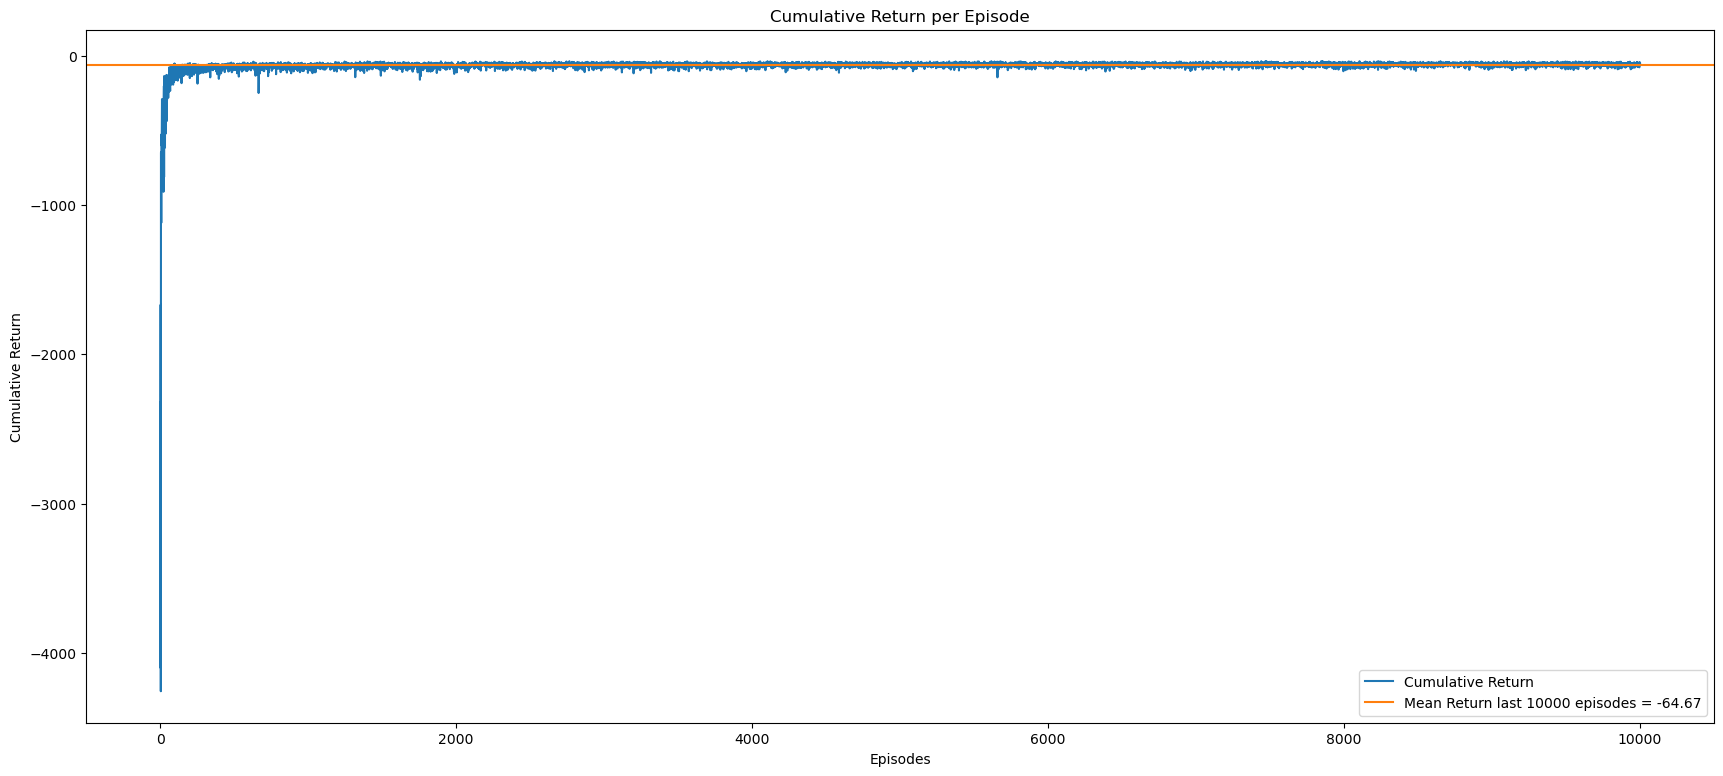

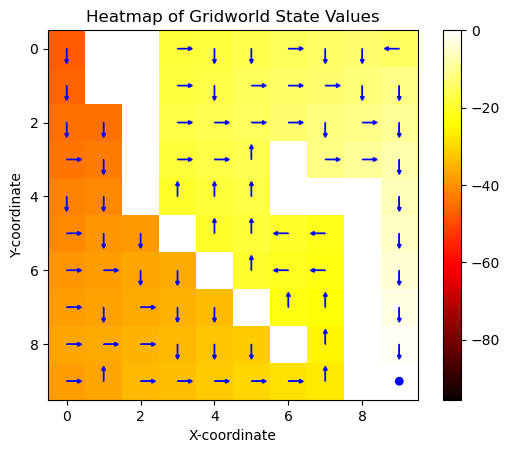

In [15]:
training_episodes = 10_000
plot_frequency = 100
q_learning_agent.train(training_episodes, True, plot_frequency)
q_learning_agent.update_plot(training_episodes)
q_learning_agent.plot_value_table()

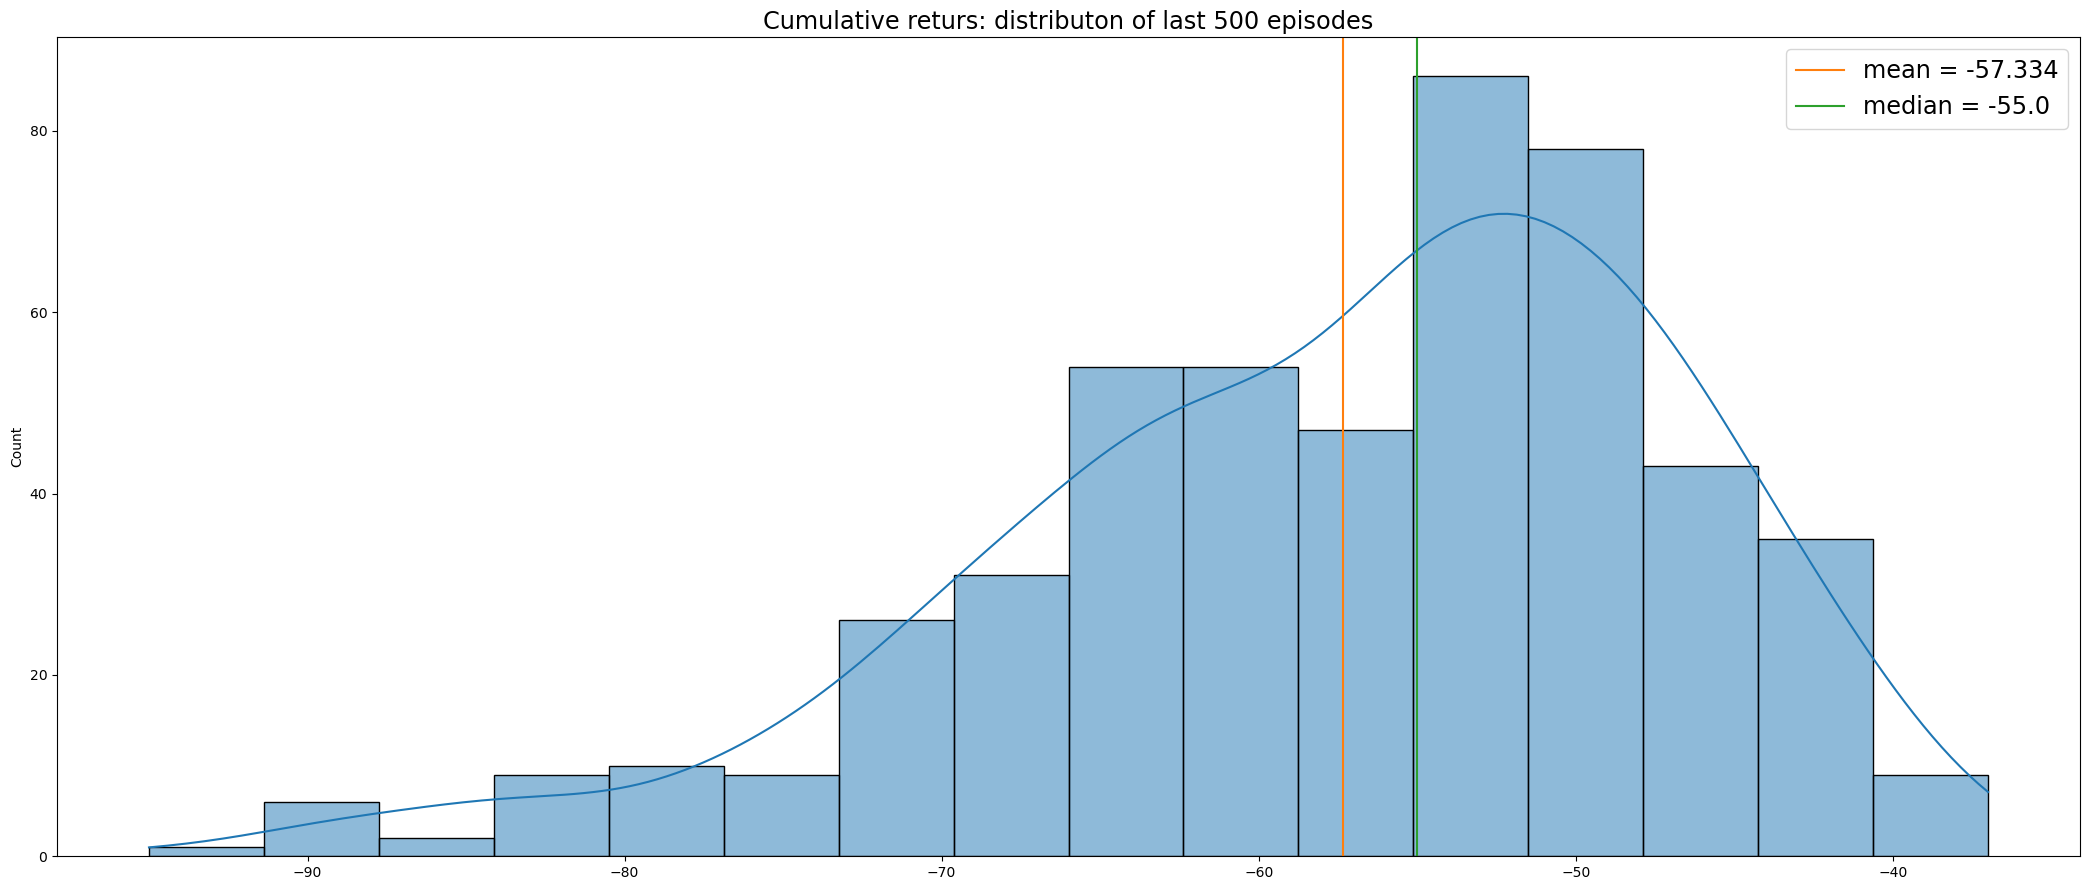

In [30]:
cum_ret_series = pd.Series(q_learning_agent.cumulative_returns)
n_last = 500
last_returns = cum_ret_series[-n_last:]


plt.style.use("default")
fig, ax = plt.subplots(figsize=(21, 9), tight_layout=True)
sns.histplot(last_returns, kde=True, ax=ax)
ax.set_title(f"Cumulative returs: distributon of last {n_last} episodes", fontsize="xx-large")
ax.axvline(last_returns.mean(), label=f"mean = {last_returns.mean()}", color=colors[1], linestyle="-")
ax.axvline(last_returns.median(), label=f"median = {last_returns.median()}", color=colors[2], linestyle="-")
ax.legend(fontsize="xx-large")
plt.show();

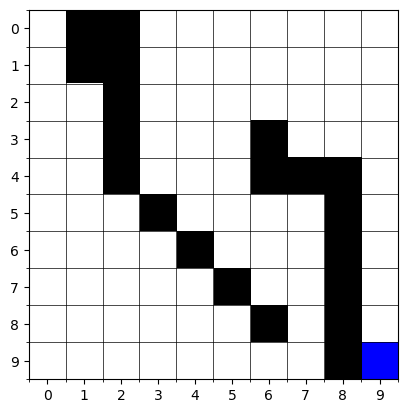

Target reached!


In [31]:
q_learning_agent.env.reset()
q_learning_agent.animate_robot_movement()